### Importing common Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# link to dataset: https://www.kaggle.com/datasets/mjshri23/life-expectancy-and-socio-economic-world-bank?resource=download

### Reading CSV file and looking at the dataset

In [3]:
df = pd.read_csv("life expectancy.csv")
df.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,NaN,NaN,10.809000,NaN,NaN,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,NaN,4.004000,NaN,NaN,1392080.71,11190210.53,2663516.34
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.4587,18.575001,NaN,40.520895,117081.67,140894.78,532324.75
3,Andorra,AND,Europe & Central Asia,High income,2001,NaN,NaN,520.0,5.865939,NaN,NaN,NaN,21.788660,1697.99,695.56,13636.64
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.0,2.484370,NaN,2.493000,NaN,NaN,144678.14,65271.91,481740.70


In [4]:
df.shape

(3306, 16)

In [5]:
df.dtypes

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object

In [6]:
df.isnull().sum()

Country Name                         0
Country Code                         0
Region                               0
IncomeGroup                          0
Year                                 0
Life Expectancy World Bank         188
Prevelance of Undernourishment     684
CO2                                152
Health Expenditure %               180
Education Expenditure %           1090
Unemployment                       304
Corruption                        2331
Sanitation                        1247
Injuries                             0
Communicable                         0
NonCommunicable                      0
dtype: int64

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [8]:
df["Country Name"].nunique()

174

In [9]:
df["Year"].min()

2001

In [10]:
df["Year"].max()

2019

In [11]:
df.describe()

,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3306.000000,3306.000000,3.306000e+03,3306.000000,3306.000000,3306.000000,3306.000000,3306.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.136652,10.050412,7.546652e+05,2.764345,1.734866,5.975475,0.337307,23.773296,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,64.215000,2.800000,2.182500e+03,4.304727,3.698569,3.906250,2.860513,39.472910,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,71.522500,9.200000,1.208000e+04,6.146391,4.589014,6.660000,2.860513,52.738785,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.474207,11.600000,7.357250e+04,8.001557,4.922585,9.500750,2.860513,63.658282,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [12]:
df["Region"].unique()

array(['South Asia', 'Sub-Saharan Africa', 'Europe & Central Asia',
       'Middle East & North Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

### Creating a dataframe for all regions that contain the word 'Asia'

In [13]:
asia = df[df["Region"].str.contains("Asia")]
asia.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,6.364059,4.589014,10.809000,2.860513,52.738785,2179727.10,9689193.70,5795426.38
2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.0,7.139524,3.458700,18.575001,2.860513,40.520895,117081.67,140894.78,532324.75


In [14]:
asia["Region"].value_counts()

Europe & Central Asia    893
East Asia & Pacific      513
South Asia               152
Name: Region, dtype: int64

In [15]:
asia["Country Name"].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Armenia', 'American Samoa',
       'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Bangladesh',
       'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Bhutan',
       'Switzerland', 'China', 'Cyprus', 'Germany', 'Denmark', 'Spain',
       'Estonia', 'Finland', 'Fiji', 'France', 'United Kingdom',
       'Georgia', 'Greece', 'Greenland', 'Guam', 'Croatia', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iceland', 'Italy', 'Japan',
       'Kazakhstan', 'Cambodia', 'Kiribati', 'Sri Lanka', 'Lithuania',
       'Luxembourg', 'Latvia', 'Monaco', 'Moldova', 'Maldives',
       'Marshall Islands', 'North Macedonia', 'Myanmar', 'Montenegro',
       'Mongolia', 'Northern Mariana Islands', 'Malaysia', 'Netherlands',
       'Norway', 'Nepal', 'Nauru', 'New Zealand', 'Pakistan',
       'Philippines', 'Palau', 'Papua New Guinea', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Solomon Islands', 'San Marino', 'Serbia',
       'Slovenia', 'Swede

As we can see above, this dataframe contains many non-Asian countries. We would need to redefine the regions if we
wanted a 'pure' Asia region consisting of Asian countries only.

### Looking at the mean of life expectancy, health expenditure and sanitation for the new dataframe

In [16]:
asia[["Life Expectancy World Bank", "Health Expenditure %", "Sanitation"]].mean()

Life Expectancy World Bank    73.672442
Health Expenditure %           6.905625
Sanitation                    61.269437
dtype: float64

### Comparing with the means above with 2019 only

In [17]:
asia_2019 = asia[asia["Year"] == 2019]
asia_2019.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
3132,Afghanistan,AFG,South Asia,Low income,2019,64.833,26.9,6079.999924,13.242202,3.21378,11.217,2.000000,52.738785,3481166.42,6034434.86,7601757.82
3134,Albania,ALB,Europe & Central Asia,Upper middle income,2019,78.573,4.3,4829.999924,6.364059,3.91665,11.470,2.860513,47.577141,82288.10,51797.42,631629.88


In [18]:
asia_2019[["Life Expectancy World Bank", "Health Expenditure %", "Sanitation"]].mean()

Life Expectancy World Bank    75.584259
Health Expenditure %           7.341037
Sanitation                    66.080276
dtype: float64

### Looking at the count of each income group for the asia_2019 dataframe

In [19]:
asia_2019["IncomeGroup"].value_counts()

High income            38
Upper middle income    23
Lower middle income    20
Low income              1
Name: IncomeGroup, dtype: int64

<AxesSubplot: xlabel='count', ylabel='IncomeGroup'>

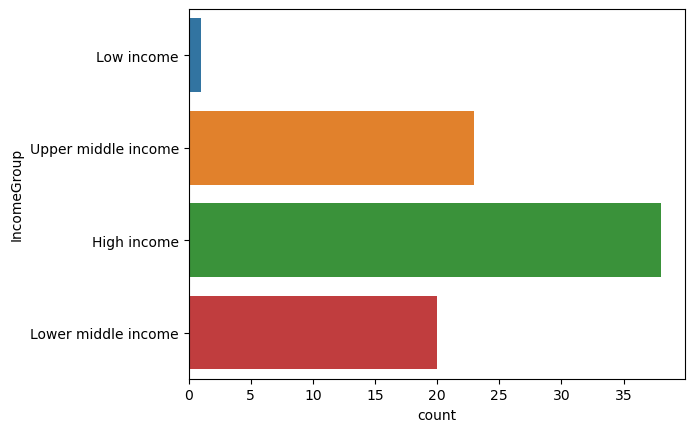

In [20]:
sns.countplot(data=asia_2019, y="IncomeGroup")

### Which Country was low income?

In [21]:
asia_2019[asia_2019["IncomeGroup"] == "Low income"]["Country Name"]

3132    Afghanistan
Name: Country Name, dtype: object

### How has the life expectancy changed over the last 5 years in the original dataframe

In [22]:
df["Year"].unique()[-5:]

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [23]:
last_5_years = df[df["Year"] >= df["Year"].max() - 4]
last_5_years.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
2436,Afghanistan,AFG,South Asia,Low income,2015,63.377,21.5,5949.999809,10.105348,3.255800,11.127,2.000000,52.738785,3673696.62,6528888.62,6988545.28
2437,Angola,AGO,Sub-Saharan Africa,Lower middle income,2015,59.398,14.5,31649.999619,2.605795,3.486896,7.392,2.860513,52.738785,1176597.19,8056503.17,3778744.40


In [24]:
last_5_years["Year"].unique()

array([2015, 2016, 2017, 2018, 2019], dtype=int64)

In [25]:
last_5_years.groupby("Year")["Life Expectancy World Bank"].mean()

Year
2015    71.488899
2016    71.766221
2017    71.988161
2018    72.199052
2019    72.425850
Name: Life Expectancy World Bank, dtype: float64

([<matplotlib.axis.XTick at 0x230ede4edd0>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019')])

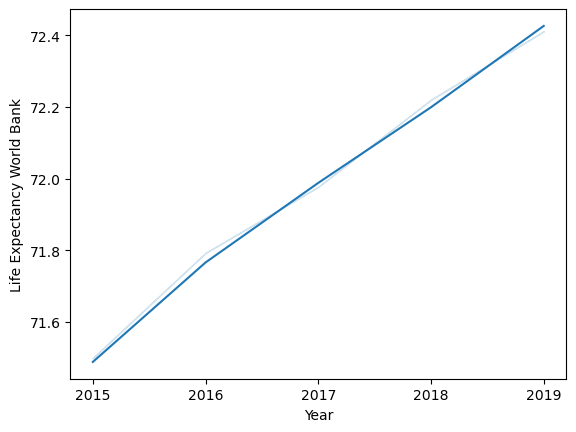

In [26]:
ax = sns.lineplot(last_5_years, x="Year", y="Life Expectancy World Bank", errorbar=("ci", False))

plt.xticks([2015, 2016, 2017, 2018, 2019])

In [27]:
df["Year"].unique()[-10:]

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

### How has life expectancy changed over the last 10 years for Angola

In [28]:
angola_10yr = df[(df["Year"] >= 2010) & (df["Country Name"] == "Angola")]
angola_10yr

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
1567,Angola,AGO,Sub-Saharan Africa,Lower middle income,2010,55.350,23.9,22799.999237,2.695100,3.421320,9.430,2.500000,52.738785,1267430.98,9369345.53,3427812.06
1741,Angola,AGO,Sub-Saharan Africa,Lower middle income,2011,56.330,16.4,23870.000839,2.645608,3.030000,7.360,2.500000,52.738785,1263108.34,9114917.42,3506251.22
1915,Angola,AGO,Sub-Saharan Africa,Lower middle income,2012,57.236,15.1,23870.000839,2.395750,3.081911,7.347,2.500000,52.738785,1245939.46,8866604.66,3590872.46
2089,Angola,AGO,Sub-Saharan Africa,Lower middle income,2013,58.054,14.3,26959.999084,2.732828,4.438950,7.366,2.500000,52.738785,1215812.93,8611584.35,3654037.29
2263,Angola,AGO,Sub-Saharan Africa,Lower middle income,2014,58.776,13.7,29629.999161,2.434129,3.122918,7.372,2.860513,52.738785,1182079.97,8309452.09,3692435.18
2437,Angola,AGO,Sub-Saharan Africa,Lower middle income,2015,59.398,14.5,31649.999619,2.605795,3.486896,7.392,2.860513,52.738785,1176597.19,8056503.17,3778744.40
2611,Angola,AGO,Sub-Saharan Africa,Lower middle income,2016,59.925,15.4,29760.000229,2.713149,2.754936,7.412,2.860513,52.738785,1151526.25,7928961.23,3845106.11
2785,Angola,AGO,Sub-Saharan Africa,Lower middle income,2017,60.379,15.4,24250.000000,2.791503,2.466879,7.408,2.860513,52.738785,1155447.76,7697608.85,3949010.17
2959,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,60.782,15.7,23959.999084,2.540102,2.044701,7.421,2.860513,52.738785,1158963.53,7474999.86,4055077.37
3133,Angola,AGO,Sub-Saharan Africa,Lower middle income,2019,61.147,17.9,25209.999084,2.533360,1.927457,7.421,2.860513,52.738785,1168866.00,7237433.13,4176568.27


<AxesSubplot: xlabel='Year', ylabel='Life Expectancy World Bank'>

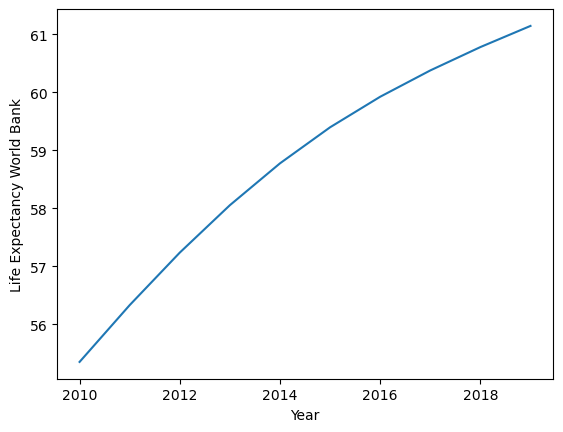

In [29]:
sns.lineplot(angola_10yr, x="Year", y="Life Expectancy World Bank")

### What is the life expectancy for each South Asian country in 2019

In [30]:
df.groupby("Region")["Country Name"].nunique()

Region
East Asia & Pacific           27
Europe & Central Asia         47
Latin America & Caribbean     29
Middle East & North Africa    16
North America                  3
South Asia                     8
Sub-Saharan Africa            44
Name: Country Name, dtype: int64

In [31]:
south_asia_2019 = df[(df["Region"] == "South Asia") & (df["Year"] == 2019)]
south_asia_2019

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
3132,Afghanistan,AFG,South Asia,Low income,2019,64.833,26.900000,6.080000e+03,13.242202,3.213780,11.217,2.000000,52.738785,3481166.42,6.034435e+06,7.601758e+06
3148,Bangladesh,BGD,South Asia,Lower middle income,2019,72.591,11.000000,9.074000e+04,2.483576,1.326320,4.438,2.500000,37.684884,3193719.60,1.167252e+07,2.825667e+07
3158,Bhutan,BTN,South Asia,Lower middle income,2019,71.777,10.663654,1.050000e+03,3.607616,5.675892,2.502,4.500000,64.630026,19966.53,6.109057e+04,1.329178e+05
3204,India,IND,South Asia,Lower middle income,2019,69.656,14.600000,2.456300e+06,3.014147,4.407230,5.270,2.860513,43.904290,53563909.73,1.432145e+08,2.710974e+08
3221,Sri Lanka,LKA,South Asia,Lower middle income,2019,76.978,3.700000,2.378000e+04,4.079797,1.930000,4.350,3.000000,52.738785,747286.53,5.612344e+05,4.412887e+06
3230,Maldives,MDV,South Asia,Upper middle income,2019,78.921,10.663654,2.110000e+03,8.040011,4.121590,5.340,3.000000,52.738785,8122.28,1.599500e+04,6.672047e+04
3251,Nepal,NPL,South Asia,Lower middle income,2019,70.778,4.800000,1.345000e+04,4.445151,4.240000,3.097,3.000000,45.516779,888008.10,2.715000e+06,5.685683e+06
3255,Pakistan,PAK,South Asia,Lower middle income,2019,67.273,14.100000,1.905700e+05,3.379927,2.507550,3.542,3.000000,52.738785,5979739.34,4.706299e+07,4.119615e+07


<AxesSubplot: xlabel='Life Expectancy World Bank', ylabel='Country Name'>

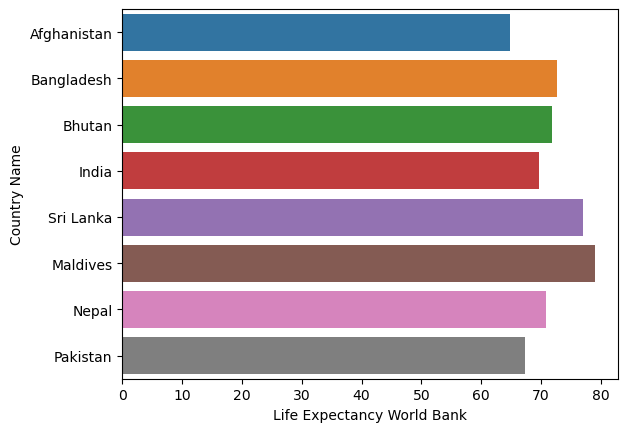

In [32]:
sns.barplot(south_asia_2019, x="Life Expectancy World Bank", y="Country Name")

### Plot a histogram for life expectancy for the whole dataset

<AxesSubplot: xlabel='Life Expectancy World Bank', ylabel='Count'>

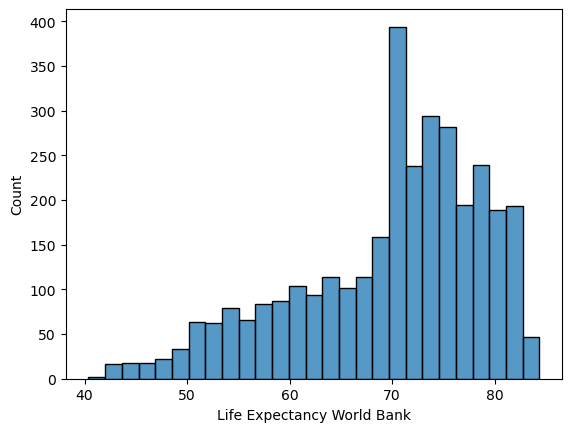

In [33]:
sns.histplot(df, x="Life Expectancy World Bank")

### Plot a boxplot life expectancy for the whole dataset

<AxesSubplot: xlabel='Life Expectancy World Bank'>

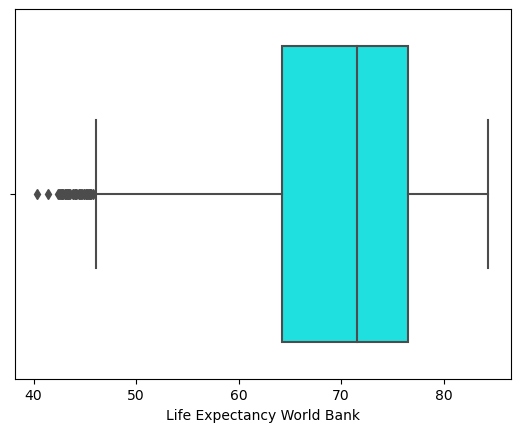

In [34]:
sns.boxplot(df, x="Life Expectancy World Bank", color="cyan")

### Plot a boxplot for life expectancy, broken down by region

<AxesSubplot: xlabel='Life Expectancy World Bank', ylabel='Region'>

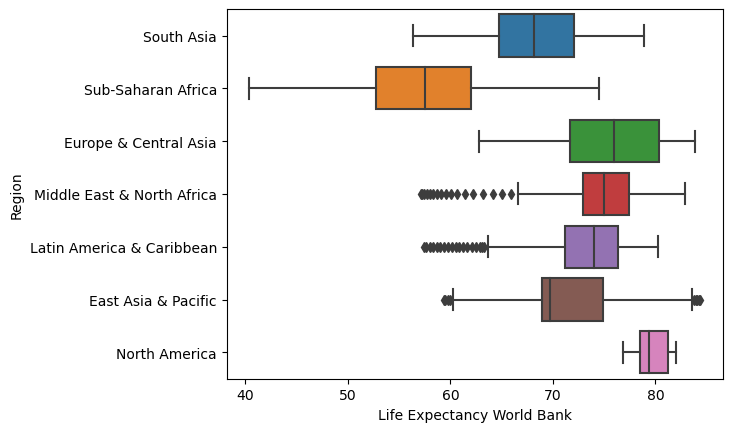

In [35]:
sns.boxplot(df, x="Life Expectancy World Bank", y="Region")

### Produce a heatmap showing correlation between a few of the variables

In [36]:
df.head(2)

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.0,6.364059,4.589014,10.809,2.860513,52.738785,2179727.10,9689193.70,5795426.38
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.0,4.483516,4.589014,4.004,2.860513,52.738785,1392080.71,11190210.53,2663516.34


In [37]:
pc = df[["Life Expectancy World Bank", "Prevelance of Undernourishment", "Health Expenditure %", "Sanitation"]].corr()
pc

,Life Expectancy World Bank,Prevelance of Undernourishment,Health Expenditure %,Sanitation
Life Expectancy World Bank,1.000000,-0.613712,0.275310,0.509611
Prevelance of Undernourishment,-0.613712,1.000000,-0.194481,-0.397186
Health Expenditure %,0.275310,-0.194481,1.000000,0.179972
Sanitation,0.509611,-0.397186,0.179972,1.000000


<AxesSubplot: >

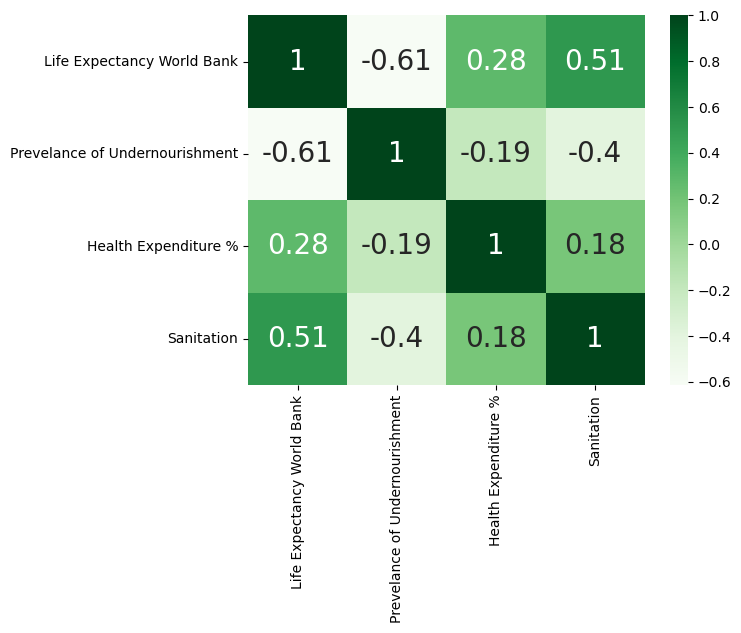

In [38]:
col = ["Life Expectancy World Bank", "Prevelance of Undernourishment", "Health Expenditure %", "Sanitation"]

sns.heatmap(pc, 
            annot = True,
            annot_kws = {"size":20},
            xticklabels = col,
            yticklabels = col,
            cmap="Greens")